In [26]:
import sys
import pandas as pd                   
import matplotlib.pyplot as plt      
import datetime as dt                  
import numpy as np                    
import seaborn as sns
import re
from seaborn.linearmodels import corrplot

%matplotlib inline 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print('Python version: ', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())

('Python version: ', '2.7.12 |Anaconda custom (64-bit)| (default, Jun 29 2016, 11:07:13) [MSC v.1500 64 bit (AMD64)]')
('Pandas version: ', u'0.18.1')
('Today: ', datetime.date(2017, 6, 18))


In [2]:
#Vamos a echar un vistazo a nuestros datasets obtenidos de www.insideairbnb.com
#La data obtenida es del 08 de abril de 2017

In [3]:
#Según Insideairbnb.com, la siguiente tabla es: Detailed Listings data for Madrid
listing = pd.read_csv('./listings_1.csv', sep=',')
print 'Dimensión:', listing.shape
listing.head(3)

Dimensión: (13335, 95)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,7830063,https://www.airbnb.com/rooms/7830063,20170407214119,2017-04-08,Quiet room in Plaza Mayor,Room in magnificent property in the historic c...,"Based in the historic center of Madrid, to 1 m...",Room in magnificent property in the historic c...,none,"In the historic heart of Madrid, near the Plaz...",Check-in from 21:00 to 23:00 has an extra char...,Very well connected by buses and subwa (Tirso ...,Quiet room on the first floor of historic buil...,Maps and all kind of information and recommend...,Please respect the silence of the other guests...,https://a0.muscache.com/im/pictures/99669989/f...,https://a0.muscache.com/im/pictures/99669989/f...,https://a0.muscache.com/im/pictures/99669989/f...,https://a0.muscache.com/im/pictures/99669989/f...,41032693,https://www.airbnb.com/users/show/41032693,Bluekitchen,2015-08-10,"Madrid, Community of Madrid, Spain",Somos dos amigos de la infancia de Madrid que ...,within an hour,100%,NaN,f,https://a0.muscache.com/im/users/41032693/prof...,https://a0.muscache.com/im/users/41032693/prof...,La Latina,7.0,7.0,"['email', 'phone', 'reviews', 'jumio']",t,t,"La Latina, Madrid, Comunidad de Madrid 28005, ...",La Latina,Palacio,Centro,Madrid,Comunidad de Madrid,28005,Madrid,"Madrid, Spain",ES,Spain,40.412275,-3.708718,t,House,Private room,2,2.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,Doorm...",NaN,$42.00,$300.00,"$1,200.00",$100.00,$15.00,2,$0.00,2,30,2 weeks ago,NaN,4,13,37,165,2017-04-08,100,2015-08-23,2017-04-02,92.0,9.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,t,moderate,f,f,7,5.04
1,9898596,https://www.airbnb.com/rooms/9898596,20170407214119,2017-04-08,Homely apartment in the heart of Madrid,"Spacious apartment for up to 10 people, with a...",This spacious apartment is located in the cent...,"Spacious apartment for up to 10 people, with a...",none,The Living Santa Ana Apartments are located in...,NaN,We are 3m walk from the La Latina subway.,NaN,"During his stay, please contact us if you have...",The apartment is located in a community of nei...,https://a0.muscache.com/im/pictures/f3336e14-5...,https://a0.muscache.com/im/pictures/f3336e14-5...,https://a0.muscache.com/im/pictures/f3336e14-5...,https://a0.muscache.com/im/pictures/f3336e14-5...,50908516,https://www.airbnb.com/users/show/50908516,Daniel,2015-12-09,"Madrid, Community of Madrid, Spain","Somos Amanda y Dani, tenemos este establecimie...",within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/0061d173-a...,https://a0.muscache.com/im/pictures/0061d173-a...,La Latina,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",t,t,"L

In [4]:
listing.columns

Index([u'id', u'listing_url', u'scrape_id', u'last_scraped', u'name',
       u'summary', u'space', u'description', u'experiences_offered',
       u'neighborhood_overview', u'notes', u'transit', u'access',
       u'interaction', u'house_rules', u'thumbnail_url', u'medium_url',
       u'picture_url', u'xl_picture_url', u'host_id', u'host_url',
       u'host_name', u'host_since', u'host_location', u'host_about',
       u'host_response_time', u'host_response_rate', u'host_acceptance_rate',
       u'host_is_superhost', u'host_thumbnail_url', u'host_picture_url',
       u'host_neighbourhood', u'host_listings_count',
       u'host_total_listings_count', u'host_verifications',
       u'host_has_profile_pic', u'host_identity_verified', u'street',
       u'neighbourhood', u'neighbourhood_cleansed',
       u'neighbourhood_group_cleansed', u'city', u'state', u'zipcode',
       u'market', u'smart_location', u'country_code', u'country', u'latitude',
       u'longitude', u'is_location_exact', u'prope

In [5]:
#Según Insideairbnb.com, la siguiente tabla es: Summary information and metrics for listings in Madrid (good for visualisations).
listing_sum = pd.read_csv('./listings.csv', sep=',')
print 'Dimensión:', listing_sum.shape
listing_sum.head(3)

Dimensión: (13335, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,7830063,Quiet room in Plaza Mayor,41032693,Bluekitchen,Centro,Palacio,40.412275,-3.708718,Private room,42,2,100,2017-04-02,5.04,7,165
1,9898596,Homely apartment in the heart of Madrid,50908516,Daniel,Centro,Palacio,40.411093,-3.708985,Entire home/apt,135,1,68,2017-04-04,4.39,1,230
2,15334645,Piso Muy Luminoso en pleno centro de Madrid,97753616,Will,Centro,Palacio,40.413587,-3.708945,Entire home/apt,81,1,34,2017-03-21,5.57,1,287


In [6]:
#Según Insideairbnb.com, la siguiente tabla es: Detailed Calendar Data for listings in Madrid
calendar = pd.read_csv('./calendar.csv', sep=',')
calendar.tail(3)

,listing_id,date,available,price
4867272,17829874,2017-04-10,t,$15.00
4867273,17829874,2017-04-09,t,$15.00
4867274,17829874,2017-04-08,f,NaN


In [7]:
#Según Insideairbnb.com, la siguiente tabla es: Detailed Review Data for listings in Madrid
review_sum = pd.read_csv('./reviews_1.csv')
review_sum.head(3)

,listing_id,date
0,15128601,2016-09-25
1,15128601,2016-10-03
2,15128601,2016-10-07


In [8]:
#Según Insideairbnb.com, la siguiente tabla es: Summary Review data and Listing ID (to facilitate time based analytics and visualisations linked to a listing).
review = pd.read_csv('./reviews.csv')
review.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,15128601,103956852,2016-09-25,48832799,Amparo,"Apartamento muy acogedor, limpio y cómodo, en ..."
1,15128601,105883025,2016-10-03,87158075,Daniela,"La descripción del anuncio era correcta, las f..."
2,15128601,106595943,2016-10-07,10102108,Fabien,Nice and cosy place. Really peaceful and quiet...


# Una vez vistos los datos que podemos obtener de Inside Airbnb, vamos a descartar las tablas resumidas y usar las tablas que tienen mayor cantidad de datos para poder moldearlas a nuestro gusto.

## Las tablas que finalmente utilizaremos serán: 
- listing = pd.read_csv('./listings_1.csv', sep=',')
- calendar = pd.read_csv('./calendar.csv', sep=',')
- review = pd.read_csv('./reviews.csv')

In [9]:
listing.describe().transpose()

C:\Users\ronny\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
id,13335.0,1.043929e+07,5.517349e+06,1.862800e+04,5.858327e+06,1.157754e+07,1.538489e+07,1.810984e+07
scrape_id,13335.0,2.017041e+13,4.890808e+00,2.017041e+13,2.017041e+13,2.017041e+13,2.017041e+13,2.017041e+13
host_id,13335.0,3.775842e+07,3.470057e+07,1.745300e+04,7.823688e+06,2.752699e+07,5.799251e+07,1.247534e+08
host_acceptance_rate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_listings_count,13332.0,9.777453e+00,2.781298e+01,0.000000e+00,NaN,NaN,NaN,5.190000e+02
host_total_listings_count,13332.0,9.777453e+00,2.781298e+01,0.000000e+00,NaN,NaN,NaN,5.190000e+02
latitude,13335.0,4.042073e+01,2.034312e-02,4.033189e+01,4.041009e+01,4.041872e+01,4.042800e+01,4.056274e+01
longitude,13335.0,-3.697255e+00,2.383740e-02,-3.863907e+00,-3.707852e+00,-3.701596e+00,-3.693810e+00,-3.526821e+00
accommodates,13335.0,3.184252e+00,1.990534e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,13285.0,1.251675e+00,5.981173e-01,0.000000e+00,NaN,NaN,NaN,8.000000e+00


<h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1>
Real data is never clean. We need to make sure we clean the data by converting or getting rid of null or missing values.<br>


In [10]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13335 entries, 0 to 13334
Data columns (total 95 columns):
id                                  13335 non-null int64
listing_url                         13335 non-null object
scrape_id                           13335 non-null int64
last_scraped                        13335 non-null object
name                                13335 non-null object
summary                             12846 non-null object
space                               9700 non-null object
description                         13329 non-null object
experiences_offered                 13335 non-null object
neighborhood_overview               8308 non-null object
notes                               5037 non-null object
transit                             8264 non-null object
access                              7546 non-null object
interaction                         7523 non-null object
house_rules                         8666 non-null object
thumbnail_url                 

In [11]:
#is any row NULL ?
print listing.isnull().any().any() 
print listing.shape

True
(13335, 95)


Now let's try to find how many data points in each column are null.

In [12]:
listing.isnull().sum(axis=0)

id                                      0
listing_url                             0
scrape_id                               0
last_scraped                            0
name                                    0
summary                               489
space                                3635
description                             6
experiences_offered                     0
neighborhood_overview                5027
notes                                8298
transit                              5071
access                               5789
interaction                          5812
house_rules                          4669
thumbnail_url                        2488
medium_url                           2488
picture_url                             0
xl_picture_url                       2488
host_id                                 0
host_url                                0
host_name                               3
host_since                              3
host_location                     

El paso anterior ya nos dió un indicio de que hay varias columnas con datos únicamente nulos.

## Fixing Null Values by Deleting Them

In [13]:
listing.isnull().all()

id                                  False
listing_url                         False
scrape_id                           False
last_scraped                        False
name                                False
summary                             False
space                               False
description                         False
experiences_offered                 False
neighborhood_overview               False
notes                               False
transit                             False
access                              False
interaction                         False
house_rules                         False
thumbnail_url                       False
medium_url                          False
picture_url                         False
xl_picture_url                      False
host_id                             False
host_url                            False
host_name                           False
host_since                          False
host_location                     

In [14]:
print listing['jurisdiction_names'].unique()
print listing['has_availability'].unique()
print listing['host_acceptance_rate'].unique()

[ nan]
[ nan]
[ nan]


In [15]:
listing.drop('jurisdiction_names', axis=1, inplace=True)
listing.drop('has_availability', axis=1, inplace=True)
listing.drop('host_acceptance_rate', axis=1, inplace=True)

In [16]:
listing.shape

(13335, 92)

Nuestra tabla de datos tiene muchas líneas o registros. Para no afectar el funcionamiento de nuestro ordenador, sólo podemos mirar pocas líneas a la vez. Ahora bien, en vez de mirar las mismas 10 líneas principales cada vez, aplicaremos lo siguiente con lo que conseguiremos ver una muestra aleatoria diferente en nuestro head(). De esta manera, nos aseguramos de que los datos no estén en ningún orden particular cuando probamos el muestreo (como tomar filas de arriba o de abajo) al mezclar aleatoriamente las filas.

In [17]:
#Shuffle the rows of listing so we get a distributed sample when we display top few rows

listing = listing.reindex(np.random.permutation(listing.index))
listing.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
4024,7659665,https://www.airbnb.com/rooms/7659665,20170407214119,2017-04-08,Gran Via designer apartment,A stunning apartment in the heart of Madrid ju...,This spacious and elegant apartment is on the ...,A stunning apartment in the heart of Madrid ju...,none,The apartment is ideally located on a quiet st...,The apartment is ideal for anyone looking to s...,"Gran Via and Calle Fuencarral, two of Madrid's...",NaN,Please let us know if you have any queries! We...,- Check-in at 15:00 h - check out at 10:00 h. ...,NaN,NaN,https://a0.muscache.com/im/pictures/d50046b8-1...,NaN,6733639,https://www.airbnb.com/users/show/6733639,Susana,2013-06-04,"Mexico City, Federal District, Mexico",Hello there! I was born in Ireland to an Engli...,within a day,100%,t,https://a0.muscache.com/im/users/6733639/profi...,https://a0.muscache.com/im/users/6733639/profi...,Justicia,1.0,1.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"Justicia, Madrid, Comunidad de Madrid 28004, S...",Justicia,Justicia,Centro,Madrid,Comunidad de Madrid,28004,Madrid,"Madrid, Spain",ES,Spain,40.421233,-3.699412,t,Apartment,Entire home/apt,5,2.0,2.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$270.00,"$1,300.00","$4,500.00","$2,000.00",$80.00,4,$20.00,3,100,4 days ago,17,44,59,224,2017-04-08,42,2015-08-27,2017-02-27,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,f,moderate,f,f,1,2.13


Existen otras columnas con datos que no nos interesan, por ellos procederemos a eliminarlas:

In [18]:
delete = ['listing_url', 'scrape_id', 'last_scraped', 'thumbnail_url', 'medium_url','country_code','calendar_last_scraped', 'is_location_exact', 'host_neighbourhood', 'picture_url', 'xl_picture_url', 'host_thumbnail_url', 'host_picture_url', 'summary', 'description','host_url', 'experiences_offered']          

In [19]:
for i in range(0,len(delete)):
    listing.drop(delete[i], axis=1, inplace=True)

In [20]:
listing.shape

(13335, 75)

In [31]:
listing = listing.reindex(np.random.permutation(listing.index))
listing.head(1)

,id,name,space,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
8225,17938845,2 habitaciones barrio Salamanca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100283965,Víctor,2016-10-18,"Madrid, Community of Madrid, Spain",NaN,a few days or more,40%,f,1.0,1.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,f,"Madrid, Comunidad de Madrid 28009, Spain",NaN,Goya,Salamanca,Madrid,Comunidad de Madrid,28009,Madrid,"Madrid, Spain",Spain,40.423479,-3.671878,Apartment,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air conditio...",NaN,110.0,NaN,NaN,NaN,NaN,1,0.0,2,1125,yesterday,4,11,35,310,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,t,moderate,f,f,1,NaN


In [22]:
listing.price.head()

8903      $29.00
1195      $30.00
5762      $31.00
12696     $25.00
10143    $120.00
Name: price, dtype: object

# Debo eliminar el simbolo de dolar en la columna de precio...


In [45]:
def transform_price(df, variables=None):
    """Transform strings of price to numerals
    
    :param df: data framed to be transformed
    :param variables: list of variables to be transformed
    :return: transformed data frame
    """
    df = df.copy()
    for variable in variables:
        df[variable] = df[variable].str.strip('$').str.replace(',', '') \
            # Remove dollar signs and thousands separators
        df[variable] = df[variable].astype(np.float64)
    return df


vars_price = ['cleaning_fee', 'price', 'extra_people', 'weekly_price', 'monthly_price' ]
listing = transform_price(listing, vars_price)

In [24]:
listing['price']

8903       29.0
1195       30.0
5762       31.0
12696      25.0
10143     120.0
3317       50.0
4588       27.0
9651       22.0
3426      120.0
10851      90.0
3024       85.0
1555       35.0
9959       47.0
11910      24.0
4769       80.0
7683       64.0
1557      100.0
12178      44.0
8887      149.0
11497      20.0
8598       69.0
7092       60.0
4259       30.0
10792     125.0
5293       50.0
7319       33.0
5522      124.0
4669       62.0
10241      50.0
3293       68.0
1988       65.0
3445       34.0
11466      25.0
10075      50.0
6899       16.0
202       250.0
12930      15.0
5451      100.0
499        35.0
6246      110.0
9079       65.0
2610       26.0
13134      27.0
5449       35.0
3375      150.0
960        65.0
10996      26.0
13293      40.0
619        30.0
5396       45.0
11515     100.0
11662      60.0
1305       26.0
7942      139.0
5018       35.0
4731      110.0
11822      20.0
1697       50.0
4223       75.0
11721      80.0
10768      85.0
9544       55.0
10642   

# También se podría hacer de la siguiente manera:
listing['price'] = listing['price'].str.strip('$').str.replace(',', '')
listing['price'] = pd.to_numeric(listing.price) 

# O también:
# Remove the dollar sign and any thousand separators where the price is not NA
listing['price'] = listing.loc[listing.price.notnull()].price.apply(lambda x: re.sub('$', '', x))

# Change the price column to numeric values
listing['price'] = pd.to_numeric(listing.price)

In [25]:
listing[:10][['bedrooms', 'price']]

,bedrooms,price
8903,1.0,29.0
1195,1.0,30.0
5762,1.0,31.0
12696,1.0,25.0
10143,3.0,120.0
3317,0.0,50.0
4588,1.0,27.0
9651,1.0,22.0
3426,2.0,120.0
10851,1.0,90.0


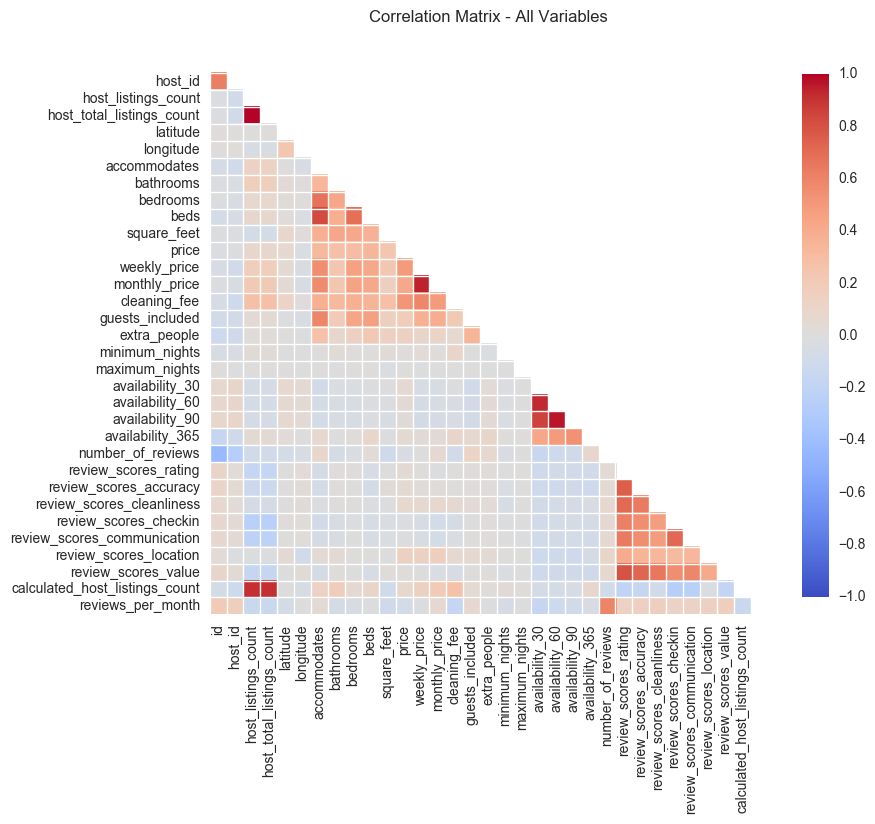

In [46]:
# Correlation Plot

sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(9, 9))
corrplot(listing, annot=False, sig_stars=False, diag_names=False, ax=ax)
plt.title('Correlation Matrix - All Variables')
plt.show()

## Feature Correlation Analysis 
Next, we will check if 'penalties' is correlated to 'overall_rating'. We are using a similar selection operation, bu this time for all the rows and within the correlation function. 

# Are these correlated (using Pearson's correlation coefficient) ?

In [30]:
listing['beds'].corr(listing['price'])

0.34212534236386671

We see that Pearson's Correlation Coefficient for these two columns is 0.34. <br><br>
Pearson goes from -1 to +1. A value of 0 would have told there is no correlation, so we shouldn’t bother looking at that attribute. A value of 0.34 shows some correlation, although it could be stronger. <br><br>
At least, we have these attributes which are slightly correlated. This gives us hope that we might be able to build a meaningful predictor using these ‘weakly’ correlated features.<br><br>
Next, we will create a list of features that we would like to iterate the same operation on.

In [ ]:
## Create a list of potential Features that you want to measure correlation with

In [47]:
potentialFeatures = ['calculated_host_listings_count', 'reviews_per_month','accommodates','bathrooms', 'bedrooms','beds',
                     'square_feet','weekly_price','extra_people','minimum_nights','maximum_nights','availability_30',
                     'availability_60','availability_90','availability_365','review_scores_rating','review_scores_accuracy',
                     'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',
                     'review_scores_value','number_of_reviews','monthly_price']


#variables dummies             'bed_type'

El bucle a continuación, nos va a indicar como cada unos de los features de la lista anterior, están relacionados con el feature "price"... Esto nos ayudará a ver qué relación existe...

Todo esto lo hago para entender los datos, entender relaciones, ver la data y poder así ir dándole forma.

In [48]:
# check how the features are correlated with the price

for f in potentialFeatures:
    related = listing['price'].corr(listing[f])
    print("%s: %f" % (f,related))

calculated_host_listings_count: 0.077614
reviews_per_month: -0.064038
accommodates: 0.323289
bathrooms: 0.277436
bedrooms: 0.292847
beds: 0.342125
square_feet: 0.227714
weekly_price: 0.487644
extra_people: 0.134853
minimum_nights: 0.013133
maximum_nights: 0.001986
availability_30: 0.059090
availability_60: 0.040859
availability_90: 0.026600
availability_365: 0.053285
review_scores_rating: 0.052688
review_scores_accuracy: 0.054569
review_scores_cleanliness: 0.077791
review_scores_checkin: -0.017581
review_scores_communication: -0.009100
review_scores_location: 0.137150
review_scores_value: 0.019256
number_of_reviews: -0.036358
monthly_price: 0.421695


## Which features have the highest correlation with price?

Looking at the values printed by the previous cell, we notice that the to two are "monthly_price" (0.42) and "shot_power" (0.43). So these two features seem to have higher correlation with "overall_rating".

<h1 style="font-size:2em;color:#2467C0">Data Visualization:</h1>
Next we will start plotting the correlation coefficients of each feature with "overall_rating". We start by selecting the columns and creating a list with correlation coefficients, called "correlations".

In [ ]:
cols = ['potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [ ]:
# create a list containing Pearson's correlation between 'overall_rating' with each column in cols
correlations = [ df['overall_rating'].corr(df[f]) for f in cols ]

In [ ]:
len(cols), len(correlations)

We make sure that the number of selected features and the correlations calculated are the same, e.g., both 34 in this case. Next couple of cells show some lines of code that use pandas plaotting functions to create a 2D graph of these correlation vealues and column names. 

In [ ]:
correlations

In [ ]:
# create a function for plotting a dataframe with string columns and numeric values

def plot_dataframe(df, y_label):  
    color='coral'
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.ylabel(y_label)

    ax = df.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation=75); #Notice the ; (remove it and see what happens !)
    plt.show()

In [ ]:
# create a dataframe using cols and correlations

df2 = pd.DataFrame({'attributes': cols, 'correlation': correlations}) 

In [ ]:
df2.head() 

In [ ]:
# let's plot above dataframe using the function we created
    
plot_dataframe(df2, 'Player\'s Overall Rating')

<h1 style="font-size:1.5em;color:#FB41C4">Analysis of Findings</h1>

Now it is time for you to analyze what we plotted. Suppose you have to predict a player's overall rating. Which 5 player attributes would you ask for?
<br><br>
<b>Hint:</b> Which are the five features with highest correlation coefficients?

<h1 style="font-size:2em;color:#2467C0">Clustering Players into Similar Groups</h1>

Until now, we used basic statistics and correlation coefficients to start forming an opinion, but can we do better? What if we took some features and start looking at each player using those features? Can we group similar players based on these features? Let's see how we can do this. 

<b>Note:</b> Generally, someone with domain knowledge needs to define which features. We could have also selected some of the features with highest correlation with overall_rating. However, it does not guarantee best outcome always as we are not sure if the top five features are independent. For example, if 4 of the 5 features depend on the remaining 1 feature, taking all 5 does not give new information.

## Select Features on Which to Group Players

In [ ]:
# Define the features you want to use for grouping players

select5features = ['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']
select5features

In [ ]:
# Generate a new dataframe by selecting the features you just defined

df_select = df[select5features].copy(deep=True)

In [ ]:
df_select.head()

## Perform KMeans Clustering

Now we will use a machine learning method called KMeans to cluster the values (i.e., player features on gk_kicking, potential, marking, interceptions, and standing_tackle). We will ask for four clusters. We will talk about KMeans clustering and other machine learning tools in Python in Week 7 so we won't discuss these methods here.

In [ ]:
# Perform scaling on the dataframe containing the features

data = scale(df_select)

# Define number of clusters
noOfClusters = 4

# Train a model
model = KMeans(init='k-means++', n_clusters=noOfClusters, n_init=20).fit(data)

In [ ]:
print(90*'_')
print("\nCount of players in each cluster")
print(90*'_')

pd.value_counts(model.labels_, sort=False)

In [ ]:
# Create a composite dataframe for plotting
# ... Use custom function declared in customplot.py (which we imported at the beginning of this notebook)

P = pd_centers(featuresUsed=select5features, centers=model.cluster_centers_)
P

<h1 style="font-size:2em;color:#2467C0">Visualization of Clusters</h1>
We now have 4 clusters based on the features we selected, we can treat them as profiles for similar groups of players. We can visualize these profiles by plotting the centers for each cluster, i.e., the average values for each feature within the cluster. We will use matplotlib for this visualization. We will learn more about matplotlib in Week 5. 

In [ ]:
# For plotting the graph inside the notebook itself, we use the following command

%matplotlib inline

In [ ]:
parallel_plot(P)

# Visualizing Data

## Neighbourhood

Primero, usamos la función groupby para agrupar la data por vecindarios (neighbourhood). Hacemos dos dataframes diferentes para pintar el precio promedio y distancia.

In [ ]:
area = listing.groupby('neighbourhood_group_cleansed')
area.head()
#nbhood_price = area['price'].agg([np.sum, np.mean, np.std])